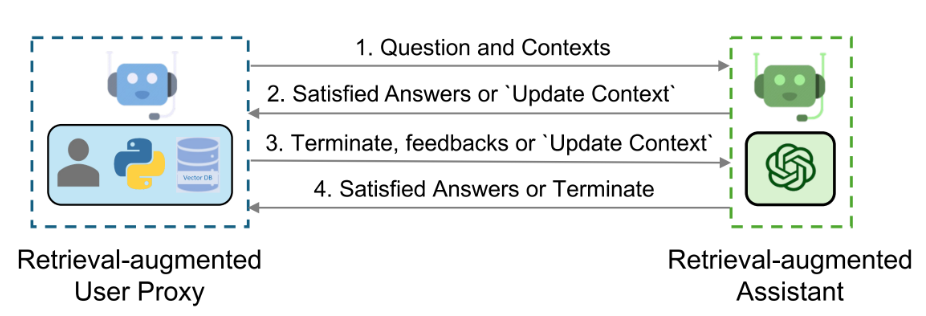

In [9]:
# Display images
from IPython.display import Image
Image(filename='images/AutoGen-RAG.png')

#### Steps
- The `RetrievalAugmentedUserProxy` retrieves document chunks based on the embedding similarity, and sends them along with the question to the `RetrievalAugmentedAssistant`.
- The `RetrievalAugmentedAssistant` employs an LLM to generate code or text as answers based on the question and context provided. If the LLM is unable to produce a satisfactory response, it is instructed to reply with "Update Context" to the `RetrievalAugmentedUserProxy`.
- `RetrievalAugmentedUserProxy` checks and does the following:
  - If a response includes code blocks, the  executes the code and sends the output as feedback.
  - If there are no code blocks or instructions to update the context, it terminates the conversation.
  - Otherwise, it updates the context and forwards the question along with the new context.
  - If human input solicitation is enabled, individuals can proactively send any feedback, including "Update Context"
- `RetrievalAugmentedAssistant` checks and does the following:
  - If receives "Update Context", it requests the next most similar chunks of documents as new context from the `RetrievalAugmentedUserProxy`.
  -  Otherwise, it generates new code or text based on the feedback and chat history. If the LLM fails to generate an answer, it replies with "Update Context" again. 
  -  This process can be repeated several times. The conversation terminates if no more documents are available for the context.

- Types of documents handled by default: plain text and PDF files, including formats such as 'txt', 'json', 'csv', 'tsv', 'md', 'html', 'htm', 'rtf', 'rst', 'jsonl', 'log', 'xml', 'yaml', 'yml' and 'pdf'.
- If you install unstructured, additional document types such as 'docx', 'doc', 'odt', 'pptx', 'ppt', 'xlsx', 'eml', 'msg', 'epub' will also be supported. 
- You can find a list of all supported document types by using `autogen.retrieve_utils.TEXT_FORMATS`

In [11]:
import autogen.retrieve_utils as retrieve_utils
retrieve_utils.TEXT_FORMATS

['htm',
 'epub',
 'tsv',
 'txt',
 'yml',
 'rtf',
 'docx',
 'doc',
 'json',
 'jsonl',
 'csv',
 'mdx',
 'org',
 'html',
 'xml',
 'odt',
 'md',
 'ppt',
 'xlsx',
 'log',
 'yaml',
 'msg',
 'pdf',
 'rst',
 'pptx']

In [13]:
import autogen
config_list = autogen.config_list_from_json(
    env_or_file="AOAI_CONFIG_LIST",
    file_location=".",
    filter_dict={
        "model": {
            "gpt-4o"
        }
    },
)

In [14]:
import autogen
from autogen import AssistantAgent
from autogen.agentchat.contrib.retrieve_user_proxy_agent import RetrieveUserProxyAgent

In [17]:
# Create a local command line code executor.
executor = autogen.coding.LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir="coding",  # Use the temporary directory to store the code files.
)

In [18]:
rag_assistant_agent = AssistantAgent(
    name="RAG_Assistant_Agent",
    system_message="You are a helpful assistant.",
    llm_config={"config_list": config_list},
)

rag_user_proxy_agent = RetrieveUserProxyAgent(
    name="RAG_User_Proxy_Agent",
    retrieve_config={
        "task": "qa",
        "docs_path": "https://raw.githubusercontent.com/microsoft/autogen/main/README.md",
    },
    code_execution_config={"executor": executor},  # Use the local command line code executor.
)

c:\TFS\Study\agentic-ai\.venv\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\deepak.agarwal\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [22]:
rag_assistant_agent.reset()
rag_user_proxy_agent.initiate_chat(
    rag_assistant_agent,
    rag_user_proxy_agent.message_generator,
    problem="Explain what is autogen framework")

RAG_User_Proxy_Agent (to RAG_Assistant_Agent):



--------------------------------------------------------------------------------
RAG_Assistant_Agent (to RAG_User_Proxy_Agent):

The concept you're referring to seems to involve a framework or a system that utilizes different components for specific tasks. Here's a brief breakdown of the terms:

1. **RAG (Retrieval-Augmented Generation)**: This is a method that combines retrieval of relevant documents or information with the generation of text. In the context of machine learning and natural language processing, RAG models retrieve relevant information from a dataset and then use that information to generate coherent and contextually accurate text. This can be particularly useful in tasks like question answering, where the model needs to provide detailed responses based on a large corpus of data.

2. **User**: In this context, the user is the individual or entity interacting with the system, posing queries, or seeking information.

3. **

ChatResult(chat_id=None, chat_history=[{'content': '', 'role': 'assistant', 'name': 'RAG_User_Proxy_Agent'}, {'content': "The concept you're referring to seems to involve a framework or a system that utilizes different components for specific tasks. Here's a brief breakdown of the terms:\n\n1. **RAG (Retrieval-Augmented Generation)**: This is a method that combines retrieval of relevant documents or information with the generation of text. In the context of machine learning and natural language processing, RAG models retrieve relevant information from a dataset and then use that information to generate coherent and contextually accurate text. This can be particularly useful in tasks like question answering, where the model needs to provide detailed responses based on a large corpus of data.\n\n2. **User**: In this context, the user is the individual or entity interacting with the system, posing queries, or seeking information.\n\n3. **Proxy**: A proxy acts as an intermediary between th

In [25]:
rag_assistant_agent.reset()
any_user_proxy_agent = autogen.UserProxyAgent(name="Any_User_Proxy_Agent", code_execution_config=False)
any_user_proxy_agent.initiate_chat(
    rag_assistant_agent, 
    message="What is autogen?"
)

Any_User_Proxy_Agent (to RAG_Assistant_Agent):

What is autogen?

--------------------------------------------------------------------------------
RAG_Assistant_Agent (to Any_User_Proxy_Agent):

"Autogen" can refer to different concepts depending on the context in which it is used. Here are a few common interpretations:

1. **Automatic Generation**: In software development, "autogen" often refers to the automatic generation of code, configuration files, documentation, or other artifacts. Tools that perform autogen tasks can save developers time and reduce human error by creating necessary components based on templates or predefined rules.

2. **Autogen (Software Tool)**: There is a specific software tool named "Autogen" that is used for generating code and other text-based files. This tool takes a template and a set of data and produces the desired output files automatically.

3. **Biological Term**: In biology, "autogen" refers to organisms that can produce certain substances or struc

KeyboardInterrupt: 

You can see that the output of `UserProxyAgent` is not related to our `autogen` since the latest info of `autogen` is not in ChatGPT's training data. The output of `RetrieveUserProxyAgent` is correct as it can perform retrieval-augmented generation based on the given documentation file.

### Customizing RAG Agents
`RetrieveUserProxyAgent` is customizable with `retrieve_config`

##### Customizing Embedding Function
- By default, **Sentence Transformers** and its pretrained models will be used to compute embeddings. 
- It's possible that you want to use OpenAI, Cohere, HuggingFace or other embedding functions.

In [ ]:
from chromadb.utils import embedding_functions
from openai import AzureOpenAI

aoai_client = AzureOpenAI(
    api_key="YOUR_AOAI_KEY_HERE", 
    azure_endpoint="https://yourazureopenaideploymenthere.openai.azure.com", 
    azure_deployment="openaiembeddingdeploymentnamehere",
    api_version="2024-02-15-preview")

openai_ef = aoai_client.embeddings.create(model_name="text-embedding-ada-002")

ragproxyagent = RetrieveUserProxyAgent(
    name="ragproxyagent",
    retrieve_config={
        "task": "qa",
        "docs_path": "https://raw.githubusercontent.com/microsoft/autogen/main/README.md",
        "embedding_function": openai_ef,
    },
)

##### Customizing Text Split Function
- Before we can store the documents into a vector database, we need to split the texts into chunks. 
- `Autogen` has an in-built flexible text splitter, but you may still use different text splitters. 
- There are also some existing text split tools which are good to reuse.

In [27]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

recur_spliter = RecursiveCharacterTextSplitter(separators=["\n", "\r", "\t"])

ragproxyagent = RetrieveUserProxyAgent(
    name="ragproxyagent",
    retrieve_config={
        "task": "qa",
        "docs_path": "https://raw.githubusercontent.com/microsoft/autogen/main/README.md",
        "custom_text_split_function": recur_spliter.split_text,
    },
    code_execution_config=False
)

##### Customizing Vector Database
- `Autogen` uses `chromadb` as the default vector database.
- You can also use `mongodb`, `pgvectordb`, `qdrantdb` and `couchbase` by simply set `vector_db` to `mongodb`, `pgvector`, `qdrant` and `couchbase` in `retrieve_config`, respectively.

## Advanced Usage of RAG Agents

- To use `RetrieveUserProxyAgent` in a group chat is almost the same as you use it in a two agents chat. 
- The only thing is that you need to **initialize the chat with** `RetrieveUserProxyAgent`.
- The `RetrieveAssistantAgent` is not necessary in a group chat.

In [ ]:
boss = autogen.UserProxyAgent(
    name="Boss",
    is_termination_msg=termination_msg,
    human_input_mode="TERMINATE",
    system_message="The boss who ask questions and give tasks.",
)

boss_aid = RetrieveUserProxyAgent(
    name="Boss_Assistant",
    is_termination_msg=termination_msg,
    system_message="Assistant who has extra content retrieval power for solving difficult problems.",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=3,
    retrieve_config={
        "task": "qa",
    },
    code_execution_config=False,  # we don't want to execute code in this case.
)

coder = autogen.AssistantAgent(
    name="Senior_Python_Engineer",
    is_termination_msg=termination_msg,
    system_message="You are a senior python engineer. Reply `TERMINATE` in the end when everything is done.",
    llm_config={"config_list": config_list, "timeout": 60, "temperature": 0},
)

pm = autogen.AssistantAgent(
    name="Product_Manager",
    is_termination_msg=termination_msg,
    system_message="You are a product manager. Reply `TERMINATE` in the end when everything is done.",
    llm_config={"config_list": config_list, "timeout": 60, "temperature": 0},
)

reviewer = autogen.AssistantAgent(
    name="Code_Reviewer",
    is_termination_msg=termination_msg,
    system_message="You are a code reviewer. Reply `TERMINATE` in the end when everything is done.",
    llm_config={"config_list": config_list, "timeout": 60, "temperature": 0},
)

def retrieve_content(
    message: Annotated[
        str,
        "Refined message which keeps the original meaning and can be used to retrieve content for code generation and question answering.",
    ],
    n_results: Annotated[int, "number of results"] = 3,
) -> str:
    boss_aid.n_results = n_results  # Set the number of results to be retrieved.
    _context = {"problem": message, "n_results": n_results}
    ret_msg = boss_aid.message_generator(boss_aid, None, _context)
    return ret_msg or message

for caller in [pm, coder, reviewer]:
    d_retrieve_content = caller.register_for_llm(
        description="retrieve content for code generation and question answering.", api_style="function"
    )(retrieve_content)

for executor in [boss, pm]:
    executor.register_for_execution()(d_retrieve_content)

groupchat = autogen.GroupChat(
    agents=[boss, pm, coder, reviewer],
    messages=[],
    max_round=12,
    speaker_selection_method="round_robin",
    allow_repeat_speaker=False,
)

llm_config = {"config_list": config_list, "timeout": 60, "temperature": 0}
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

# Start chatting with the boss as this is the user proxy agent.
boss.initiate_chat(
    manager,
    message="How to use spark for parallel training in FLAML? Give me sample code.",
)